# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

### Nombres: Freddy Silva, César Cruz, Fernando Guevara, Kailin Wu
### Matrículas: A00828792, A00825747, A00828723, A00830574

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

### Download Cifar10 dataset

In [3]:
torch.cuda.is_available()

False

In [4]:
DATA_PATH = '/workspaces/advanced_ml_methods/Activity_2/cifar10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, 
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

/usr/local/python/3.12.1/lib/python3.12/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


In [5]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /workspaces/advanced_ml_methods/Activity_2/cifar10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [6]:
train_loader.batch_size

64

### Using  GPUs

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Show images

La imagen muestreada representa un: airplane


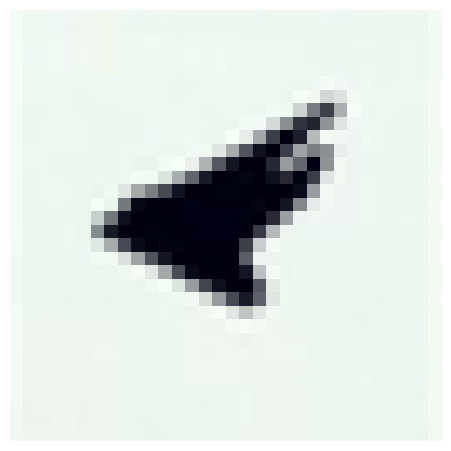

In [8]:
# Get the list of class names from the dataset
classes = test_loader.dataset.classes

# Function to display an image tensor using matplotlib
def plot_figure(image):
    # Transpose the image from (C, H, W) to (H, W, C)
    # because matplotlib expects channels as the last dimension
    plt.imshow(np.transpose(image, (1, 2, 0)))
    
    # Remove axis ticks and labels for cleaner visualization
    plt.axis('off')
    
    plt.show()

# Randomly select an index from the test dataset
rnd_sample_idx = np.random.randint(len(test_loader))

# Print the class label of the randomly selected image
# test_loader.dataset[rnd_sample_idx] returns (image, label)
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Extract the image tensor from the selected sample
image = test_loader.dataset[rnd_sample_idx][0]

# Normalize the image to the range [0, 1] for proper visualization
image = (image - image.min()) / (image.max() - image.min())

# Display the normalized image
plot_figure(image)


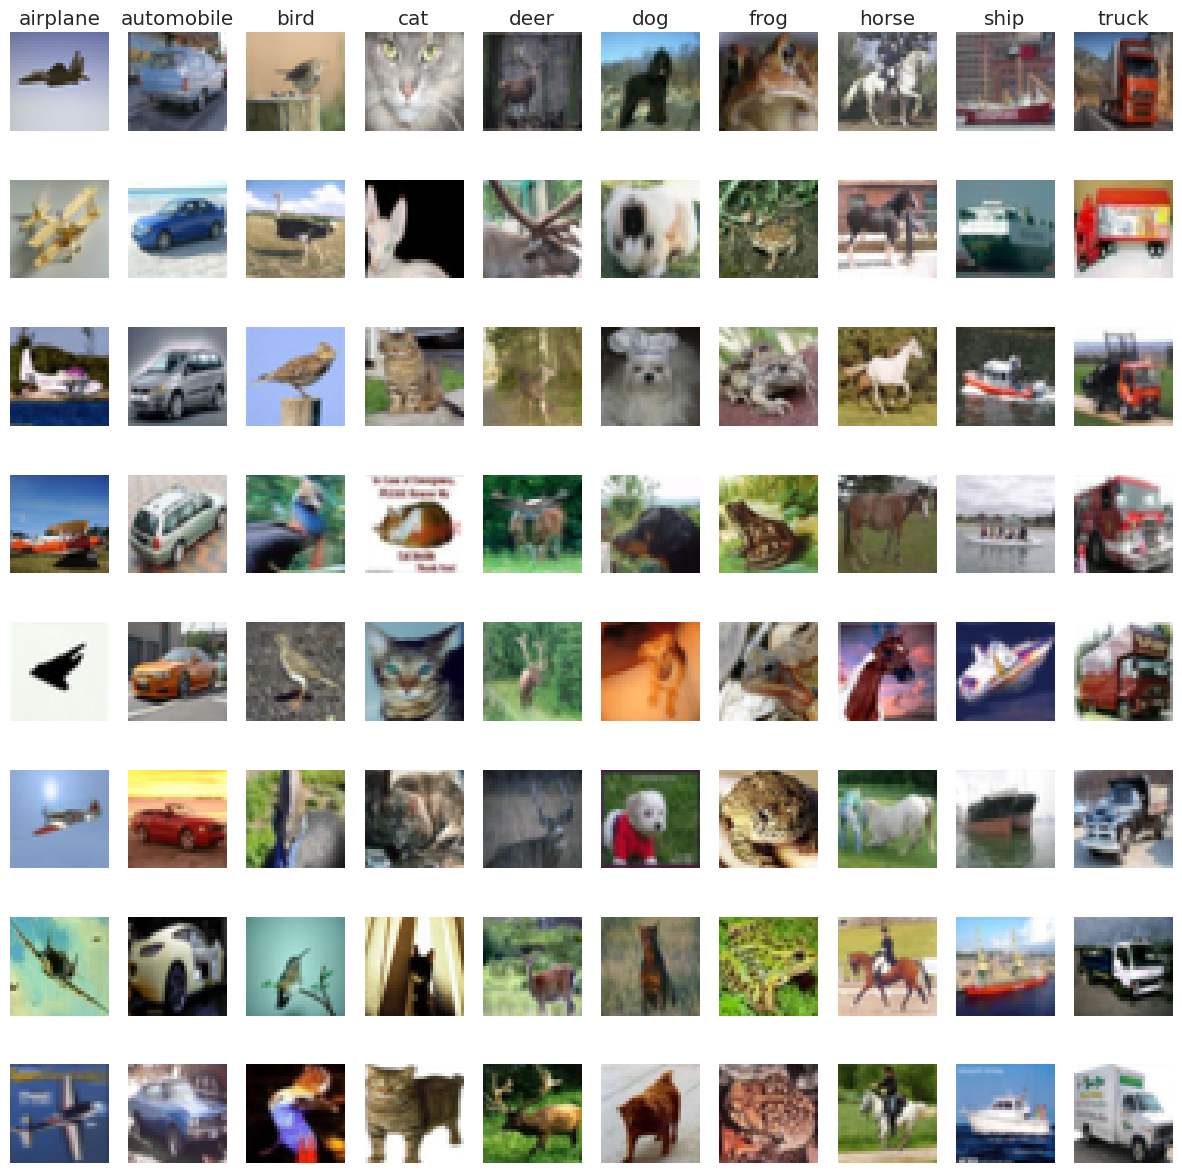

In [10]:
def plot_cifar10_grid():
    # Get class names from the dataset (e.g., airplane, car, bird, etc.)
    classes = test_loader.dataset.classes
    
    # Number of images to display per class
    total_samples = 8
    
    # Create a large figure to hold the grid
    plt.figure(figsize=(15, 15))
    
    # Iterate over each class
    # 'label' is the numeric class index
    # 'sample' is the class name
    for label, sample in enumerate(classes):
        
        # Get indices of all images belonging to the current class
        class_idxs = np.flatnonzero(
            label == np.array(test_loader.dataset.targets)
        )
        
        # Randomly select 'total_samples' images from this class
        sample_idxs = np.random.choice(
            class_idxs, 
            total_samples, 
            replace=False
        )
        
        # Plot each selected image
        for i, idx in enumerate(sample_idxs):
            
            # Compute subplot index (matplotlib indexing starts at 1)
            plt_idx = i * len(classes) + label + 1
            
            # Create subplot in a grid of:
            # rows = total_samples
            # columns = number of classes
            plt.subplot(total_samples, len(classes), plt_idx)
            
            # Display the image
            plt.imshow(test_loader.dataset.data[idx])
            
            # Hide axis ticks for cleaner layout
            plt.axis('off')
            
            # Add class title only to the first row
            if i == 0:
                plt.title(sample)
    
    # Render the full grid
    plt.show()


# Call the function to display the grid
plot_cifar10_grid()


### Calculate accuracy


In [11]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    cost = 0.
    model.eval()
    model = model.to(device=device)

    with torch.no_grad():
        for mb, (xi, yi) in enumerate(loader, 1):
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            
            scores = model(xi) # mb_size, 10
            cost += (F.cross_entropy(scores, yi)).item()
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi).sum().item() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)

        return cost / mb, num_correct / num_total

### Training Loop

In [12]:
def train(model, optimiser, epochs=100):
    model.to(device)

    for epoch in range(epochs):
        model.train()

        train_correct_num = 0
        train_total = 0
        train_cost_acum = 0.0
        num_batches = 0

        for xi, yi in train_loader:
            xi = xi.to(device, dtype=torch.float32)
            yi = yi.to(device, dtype=torch.long)

            scores = model(xi)
            cost = F.cross_entropy(scores, yi)

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            train_cost_acum += cost.item()
            num_batches += 1

            _, pred = scores.max(dim=1)
            train_correct_num += (pred == yi).sum().item()
            train_total += yi.size(0)

        train_cost = train_cost_acum / num_batches
        train_acc = train_correct_num / train_total

        val_cost, val_acc = accuracy(model, val_loader)

        print(
            f"Epoch {epoch:03d} | "
            f"train loss: {train_cost:.6f} | "
            f"val loss: {val_cost:.6f} | "
            f"train acc: {train_acc:.4f} | "
            f"val acc: {val_acc:.4f} | "
            f"lr: {optimiser.param_groups[0]['lr']:.6f}"
            )


### Linear model

In [13]:
# To do: Use PyTorch to create a linear model to have an initial baseline model
epochs = 20
lr = 1e-3
model1 = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=3072, out_features=10))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, 0.1, epochs=epochs, steps_per_epoch=215)

In [ ]:
# Train the model using the specified optimizer for a given number of epochs
train(model1, optimiser, epochs)

Epoch 000 | train loss: 2.907085 | val loss: 2.931616 | train acc: 0.2915 | val acc: 0.2940 | lr: 0.004000
Epoch 001 | train loss: 2.864380 | val loss: 3.067006 | train acc: 0.3088 | val acc: 0.3202 | lr: 0.004000
Epoch 002 | train loss: 2.872482 | val loss: 2.921016 | train acc: 0.3165 | val acc: 0.3250 | lr: 0.004000
Epoch 003 | train loss: 2.758245 | val loss: 3.352337 | train acc: 0.3232 | val acc: 0.2874 | lr: 0.004000
Epoch 004 | train loss: 2.838668 | val loss: 3.123560 | train acc: 0.3242 | val acc: 0.3054 | lr: 0.004000
Epoch 005 | train loss: 2.843247 | val loss: 2.920625 | train acc: 0.3212 | val acc: 0.3040 | lr: 0.004000
Epoch 006 | train loss: 2.812002 | val loss: 3.140055 | train acc: 0.3281 | val acc: 0.2908 | lr: 0.004000
Epoch 007 | train loss: 2.804787 | val loss: 3.012853 | train acc: 0.3281 | val acc: 0.2958 | lr: 0.004000
Epoch 008 | train loss: 2.786058 | val loss: 2.952986 | train acc: 0.3291 | val acc: 0.2970 | lr: 0.004000
Epoch 009 | train loss: 2.755693 | va

### Sequential CNN

In [ ]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than 
#the linear model
lr = 1e-3
epochs = 20

modelCNN1 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),          

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2),     

    nn.Flatten(),           
    nn.Linear(64 * 8 * 8, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimiser = torch.optim.Adam(modelCNN1.parameters(), lr=lr, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, 0.1, epochs=epochs, steps_per_epoch=215)

NameError: name 'nn' is not defined

In [16]:
train(modelCNN1, optimiser, epochs)

Epoch 000 | train loss: 1.608150 | val loss: 1.390506 | train acc: 0.4086 | val acc: 0.4958 | lr: 0.004000
Epoch 001 | train loss: 1.327581 | val loss: 1.266311 | train acc: 0.5179 | val acc: 0.5388 | lr: 0.004000
Epoch 002 | train loss: 1.242685 | val loss: 1.250688 | train acc: 0.5527 | val acc: 0.5490 | lr: 0.004000
Epoch 003 | train loss: 1.192920 | val loss: 1.233494 | train acc: 0.5724 | val acc: 0.5630 | lr: 0.004000
Epoch 004 | train loss: 1.149471 | val loss: 1.202411 | train acc: 0.5875 | val acc: 0.5762 | lr: 0.004000
Epoch 005 | train loss: 1.120363 | val loss: 1.170821 | train acc: 0.5987 | val acc: 0.5878 | lr: 0.004000
Epoch 006 | train loss: 1.089016 | val loss: 1.205767 | train acc: 0.6115 | val acc: 0.5810 | lr: 0.004000
Epoch 007 | train loss: 1.067055 | val loss: 1.164861 | train acc: 0.6195 | val acc: 0.5970 | lr: 0.004000
Epoch 008 | train loss: 1.066194 | val loss: 1.209011 | train acc: 0.6229 | val acc: 0.5808 | lr: 0.004000
Epoch 009 | train loss: 1.037473 | va

KeyboardInterrupt: 